In [1]:
# import lib
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 1. Data Understanding

In [2]:
#load dataset
df_data= pd.read_csv('../dataset/HR_dataset.csv')
df_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# show all columns
df_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
# show data info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- Datatype ok
- Khong co gia tri Null

In [5]:
#Detect Outliers data
def check_outlier(data, col):
    q1= data[col].quantile(0.25, interpolation= 'nearest')
    q3= data[col].quantile(0.75, interpolation= 'nearest')
    IQR= q3- q1
    lower_edge= q1- 1.5*IQR
    upper_edge= q3+ 1.5*IQR

    if data[col].min() > lower_edge and data[col].max() < upper_edge:
        print(f'No outliers found for {col}!')
    else:
        print('Exist some outliers')
        x= data[data[col] < lower_edge].size
        y= data[data[col] > upper_edge].size
        print(f'Number of outliers is: {x+y}')
        # data= [x for x in data if x >= lower_edge and x <= upper_edge]

cols= ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours']
for col in cols:
    check_outlier(df_data, col)

No outliers found for satisfaction_level!
No outliers found for last_evaluation!
No outliers found for number_project!
No outliers found for average_montly_hours!


## 2. Explore Data Analysis

#### 2.1 Categories features

##### 2.1.1 Explore Department features

In [6]:
### How many types of department
df_data['Department'].value_counts().to_frame().style.background_gradient(cmap= 'plasma_r')

,Department
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739
management,630


In [7]:
# display on bar and pie chart
labels= ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing', 'RandD', 'accounting', 'hr', 'management']

fig= make_subplots(rows=1, cols=2, specs=[[{'type': 'bar'}, {'type': 'pie'}]])
fig.add_trace(
    go.Bar(
        x= labels,
        y= df_data['Department'].value_counts(),
        marker_color= ['red', 'blue', 'green', 'grey', 'yellow', 'pink', 'purple', 'orange', 'black', 'brown'],
        showlegend= False,
        text= df_data['Department'].value_counts(),
        textposition= 'auto'
    ),
    row=1, col=1
)
fig.append_trace(
    go.Pie(
        labels= labels,
        values= df_data['Department'].value_counts().to_list(),
        hole=.3,
        marker= dict(colors= ['red', 'blue', 'green', 'grey', 'yellow', 'pink', 'purple', 'orange', 'black', 'brown'])
    ),
    row=1, col=2
)
fig.show()

- Nhan luc tap trung nhieu nhat o cac phong ban sales, technical, support
- Cac phong ban con lai phan bo deu

##### 2.1.2 Explore salary features

In [8]:
### Level of salary
df_data['salary'].value_counts().to_frame().style.background_gradient(cmap= 'plasma_r')

,salary
low,7316
medium,6446
high,1237


In [9]:
# display on bar and pie chart
labels= ['low', 'medium', 'high']

fig= make_subplots(rows=1, cols=2, specs=[[{'type': 'bar'}, {'type': 'pie'}]])
fig.add_trace(
    go.Bar(
        x= labels,
        y= df_data['salary'].value_counts(),
        marker_color= ['red', 'blue', 'green'],
        showlegend= False,
        text= df_data['salary'].value_counts(),
        textposition= 'auto'
    ),
    row=1, col=1
)
fig.append_trace(
    go.Pie(
        labels= labels,
        values= df_data['salary'].value_counts().to_list(),
        hole=.3,
        marker= dict(colors= ['red', 'blue', 'green'])
    ),
    row=1, col=2
)
fig.show()

_ Salary o muc trung binh va thap

##### 2.1.3 Explore promotion_last_5years features

In [10]:
### Level of salary
df_data['promotion_last_5years'].value_counts().to_frame().style.background_gradient(cmap= 'plasma_r')

,promotion_last_5years
0,14680
1,319


In [11]:
# display on bar and pie chart
labels= ['No', 'Yes']

fig= make_subplots(rows=1, cols=2, specs=[[{'type': 'bar'}, {'type': 'pie'}]])
fig.add_trace(
    go.Bar(
        x= labels,
        y= df_data['promotion_last_5years'].value_counts(),
        marker_color= ['red', 'blue'],
        showlegend= False,
        text= df_data['promotion_last_5years'].value_counts(),
        textposition= 'auto'
    ),
    row=1, col=1
)
fig.append_trace(
    go.Pie(
        labels= labels,
        values= df_data['promotion_last_5years'].value_counts().to_list(),
        hole=.3,
        marker= dict(colors= ['red', 'blue'])
    ),
    row=1, col=2
)
fig.update_layout(
    title= 'Promotion_last_5_years'
)
fig.show()

##### 2.1.4 Explore Work_accident features

In [12]:
### Level of salary
df_data['Work_accident'].value_counts().to_frame().style.background_gradient(cmap= 'plasma_r')

,Work_accident
0,12830
1,2169


In [13]:
# display on bar and pie chart
labels= ['No', 'Yes']

fig= make_subplots(rows=1, cols=2, specs=[[{'type': 'bar'}, {'type': 'pie'}]])
fig.add_trace(
    go.Bar(
        x= labels,
        y= df_data['Work_accident'].value_counts(),
        marker_color= ['red', 'blue'],
        showlegend= False,
        text= df_data['Work_accident'].value_counts(),
        textposition= 'auto'
    ),
    row=1, col=1
)
fig.append_trace(
    go.Pie(
        labels= labels,
        values= df_data['Work_accident'].value_counts().to_list(),
        hole=.3,
        marker= dict(colors= ['red', 'blue'])
    ),
    row=1, col=2
)
fig.update_layout(
    title= 'Seriously Accident'
)
fig.show()

- Sự cố trong các dự án xảy ra khá cao

#### 2.2 Explore Numerial Features

##### 2.2.1 satisfaction_level features

In [14]:
# draw violin chart
fig= px.violin(
    df_data,
    y= 'satisfaction_level',
    box= True,
    points= 'all',
    labels= {'satisfaction_level': 'Satisfaction_Level'}
)
fig.show()

_ Muc do hai long phan bo tap trung tu 0.44 - 0.82
_ Trung binh khoang 0.64. Danh gia muc trung binh kha'

##### 2.2.2 last_evaluation features

In [15]:
# draw violin chart
fig= px.violin(
    df_data,
    y= 'last_evaluation',
    box= True,
    points= 'all',
    labels= {'last_evaluation': 'Last_Evaluation'}
)
fig.show()

##### 2.2.3 average_montly_hours features

In [17]:
# draw violin chart
fig= px.violin(
    df_data,
    y= 'average_montly_hours',
    box= True,
    points= 'all',
    labels= {'average_montly_hours': 'Average_montly_hours'}
)
fig.show()

- thoi gian lam viec trong thang tap trung tu 156 - 245 h/month
- trung binh 200h/month tuong duong 7.7h/day

### 2.3 Analytic affecting of demographic information to 'left' determination

##### 2.3.1 Left vs Department

In [19]:
# select data
df_hr_lD= df_data[['Department', 'left']]
df_hr_lD= df_hr_lD.groupby('Department')['left'].value_counts()
df_hr_lD= df_hr_lD.unstack()
df_hr_lD.style.background_gradient(cmap= 'plasma_r')

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [20]:
# draw sunburst chart 
fig= px.sunburst(
    data_frame= df_data,
    path= ['Department', 'left'],
    color= 'left',
    title= 'Department vs left'
)
fig.update_traces(
    textinfo= 'label+ percent parent'
)
fig.update_layout(
    margin= dict(t=40, l=0, r=0, b=0)
)
fig.show()

- Các phòng ban có tỉ lệ nghỉ việc khá tương đương. 

##### 2.3.2 Left vs salary

In [21]:
# select data
df_hr_ls= df_data[['salary', 'left']]
df_hr_ls= df_hr_ls.groupby('salary')['left'].value_counts()
df_hr_ls= df_hr_ls.unstack()
df_hr_ls.style.background_gradient(cmap= 'plasma_r')

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [22]:
# draw sunburst chart 
fig= px.sunburst(
    data_frame= df_data,
    path= ['salary', 'left'],
    color= 'left',
    title= 'Salary vs left'
)
fig.update_traces(
    textinfo= 'label+ percent parent'
)
fig.update_layout(
    margin= dict(t=40, l=0, r=0, b=0)
)
fig.show()

##### 2.3.3 Left vs promotion_last_5years

In [23]:
# select data
df_hr_lp= df_data[['promotion_last_5years', 'left']]
df_hr_lp= df_hr_lp.groupby('promotion_last_5years')['left'].value_counts()
df_hr_lp= df_hr_lp.unstack()
df_hr_lp.style.background_gradient(cmap= 'plasma_r')

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


In [24]:
# draw sunburst chart 
fig= px.sunburst(
    data_frame= df_data,
    path= ['promotion_last_5years', 'left'],
    color= 'left',
    title= 'Promotion vs left'
)
fig.update_traces(
    textinfo= 'label+ percent parent'
)
fig.update_layout(
    margin= dict(t=40, l=0, r=0, b=0)
)
fig.show()

##### 2.3.4 Left vs time_spend_company

In [25]:
# select data
df_hr_tsc= df_data[['time_spend_company', 'left']]
df_hr_tsc= df_hr_tsc.groupby('time_spend_company')['left'].value_counts()
df_hr_tsc= df_hr_tsc.unstack()
df_hr_tsc.style.background_gradient(cmap= 'plasma_r')

left,0,1
time_spend_company,,
2,3191.000000,53.000000
3,4857.000000,1586.000000
4,1667.000000,890.000000
5,640.000000,833.000000
6,509.000000,209.000000
7,188.000000,nan
8,162.000000,nan
10,214.000000,nan


In [26]:
# draw sunburst chart 
fig= px.sunburst(
    data_frame= df_data,
    path= ['time_spend_company', 'left'],
    color= 'left',
    title= 'Seniority vs left'
)
fig.update_traces(
    textinfo= 'label+ percent parent'
)
fig.update_layout(
    margin= dict(t=40, l=0, r=0, b=0)
)
fig.show()

- Thời điểm nv nghỉ nhiều là từ 3-5 năm thâm niên do cty ko có định hướng phát triển sau 5 năm

##### 2.3.5 Left vs number_project

In [27]:
# select data
df_hr_np= df_data[['number_project', 'left']]
df_hr_np= df_hr_np.groupby('number_project')['left'].value_counts()
df_hr_np= df_hr_np.unstack()
df_hr_np.style.background_gradient(cmap= 'plasma_r')

left,0,1
number_project,,
2,821.000000,1567.000000
3,3983.000000,72.000000
4,3956.000000,409.000000
5,2149.000000,612.000000
6,519.000000,655.000000
7,nan,256.000000


In [28]:
# draw sunburst chart 
fig= px.sunburst(
    data_frame= df_data,
    path= ['number_project', 'left'],
    color= 'left',
    title= 'number_project vs left'
)
fig.update_traces(
    textinfo= 'label+ percent parent'
)
fig.update_layout(
    margin= dict(t=40, l=0, r=0, b=0)
)
fig.show()

- Nhân viên làm <2 or >5 nghỉ do làm quá nhiều hoặc quá ít dự án

## 3. Feature Engineering

In [31]:
df_data_trans= df_data.copy()

### 3.1 OneHot Encoding

In [32]:
onehot_enc_cols= ['Department', 'salary']
df_data_trans= pd.get_dummies(df_data_trans, columns= onehot_enc_cols)
df_data_trans.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### 3.2 Normalize Encoding

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
standard_cols= ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

scaler_std= StandardScaler()
scaler_std.fit(df_data_trans[standard_cols])
df_data_trans[standard_cols]= scaler_std.transform(df_data_trans[standard_cols])

### 3.3 Split data to train and test set

In [35]:
from sklearn.model_selection import train_test_split

X = df_data_trans.drop(['left'],axis=1)
y = df_data_trans['left']
# split X,y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 1)

## 4. Train ML Model

### 4.1 Knn Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

In [37]:
knn= KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
pred= knn.predict(X_test)
print(accuracy_score(y_test, pred))

0.9471111111111111


In [39]:
pred= knn.predict(X_test)
#model accuracy
acc= metrics.accuracy_score(y_test, pred)
print(f'Model acc: {acc}')
#model precision
pres= metrics.precision_score(y_test, pred)
print(f'Model pre: {pres}')
#model recall
rec= metrics.recall_score(y_test, pred)
print(f'Model rec: {rec}')

NameError: name 'metrics' is not defined

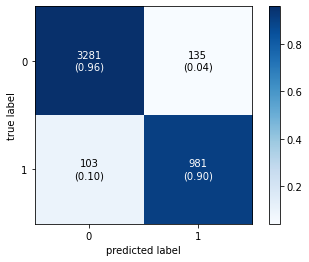

In [ ]:
cm= confusion_matrix(y_test, pred)
plot_confusion_matrix(
    conf_mat= cm,
    show_absolute= True,
    show_normed= True,
    colorbar= True
)
plt.show()


### 4.2 Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr= LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred= lgr.predict(X_test)
print(accuracy_score(y_test, pred))

0.7886666666666666


In [ ]:
pred= lgr.predict(X_test)
#model accuracy
acc= metrics.accuracy_score(y_test, pred)
print(f'Model acc: {acc}')
#model precision
pres= metrics.precision_score(y_test, pred)
print(f'Model pre: {pres}')
#model recall
rec= metrics.recall_score(y_test, pred)
print(f'Model rec: {rec}')

Model acc: 0.7886666666666666
Model pre: 0.5945945945945946
Model rec: 0.3856088560885609


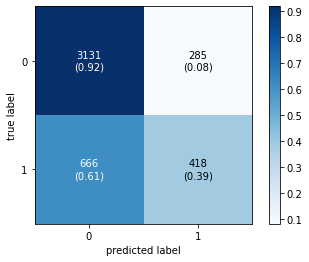

In [ ]:
cm= confusion_matrix(y_test, pred)
plot_confusion_matrix(
    conf_mat= cm,
    show_absolute= True,
    show_normed= True,
    colorbar= True
)
plt.show()


### 4.3 Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
clf= DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred= clf.predict(X_test)
print(accuracy_score(y_test, pred))
#model accuracy
acc= metrics.accuracy_score(y_test, pred)
print(f'Model acc: {acc}')
#model precision
pres= metrics.precision_score(y_test, pred)
print(f'Model pre: {pres}')
#model recall
rec= metrics.recall_score(y_test, pred)
print(f'Model rec: {rec}')

0.98
Model acc: 0.98
Model pre: 0.9618959107806692
Model rec: 0.9547970479704797


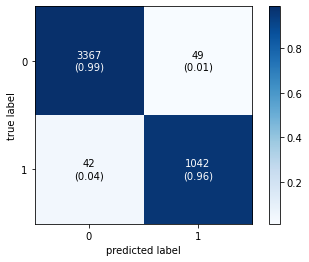

In [ ]:
cm= confusion_matrix(y_test, pred)
plot_confusion_matrix(
    conf_mat= cm,
    show_absolute= True,
    show_normed= True,
    colorbar= True
)
plt.show()